In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [38]:
data_ori = pd.read_csv('/Users/mac/Desktop/数据挖掘实验/bankloan.csv')

In [72]:
data_ori.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0,1
1,0,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560,1
2,0,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824,1
3,1,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3,1
4,1,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0,1


In [39]:
# 数据预处理
t = data_ori.isnull().sum()
print(t)

A1     12
A2      0
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A16     0
dtype: int64


In [40]:
print(t[t>0])

A1    12
A4     6
A5     6
A6     9
A7     9
dtype: int64


In [41]:
# 无缺失值
data_ori['A1'].value_counts()

b    468
a    210
Name: A1, dtype: int64

In [42]:
data_ori['A1'].fillna('b',inplace=True) # 用众数填充

In [43]:
data_ori['A4'].value_counts()

u    519
y    163
l      2
Name: A4, dtype: int64

In [44]:
data_ori['A4'].fillna('u',inplace=True) # 用众数填充

In [45]:
data_ori['A5'].value_counts()

g     519
p     163
gg      2
Name: A5, dtype: int64

In [46]:
data_ori['A5'].fillna('g',inplace=True) # 用众数填充

In [47]:
data_ori['A6'].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64

In [48]:
data_ori['A6'].fillna('c',inplace=True) # 用众数填充

In [49]:
data_ori['A7'].value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64

In [50]:
data_ori['A7'].fillna('v',inplace=True) # 用众数填充

In [51]:
data_ori['A9'].value_counts()

t    361
f    329
Name: A9, dtype: int64

In [52]:
data_ori['A9'].fillna('t',inplace=True) # 用众数填充

In [53]:
data_ori['A10'].value_counts()

f    395
t    295
Name: A10, dtype: int64

In [54]:
data_ori['A10'].fillna('f',inplace=True) # 用众数填充

In [55]:
data_ori['A12'].value_counts()

f    374
t    316
Name: A12, dtype: int64

In [56]:
data_ori['A12'].fillna('f',inplace=True) # 用众数填充

In [57]:
data_ori['A13'].value_counts()

g    625
s     57
p      8
Name: A13, dtype: int64

In [58]:
data_ori['A13'].fillna('g',inplace=True) # 用众数填充

In [59]:
cols = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']

In [60]:
for col in cols:
    print( col,'->' ,data_ori[col].unique())

A1 -> ['b' 'a']
A4 -> ['u' 'y' 'l']
A5 -> ['g' 'p' 'gg']
A6 -> ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
A7 -> ['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
A9 -> ['t' 'f']
A10 -> ['t' 'f']
A12 -> ['f' 't']
A13 -> ['g' 's' 'p']


In [61]:
data_ori.shape

(690, 16)

In [62]:
data_ori.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [63]:
# 将数值进行数据化
data_ori['A1'] = data_ori['A1'].map({'a':0,'b':1})
data_ori['A4'] = data_ori['A4'].map({'u':0,'y':1,'l':2})
data_ori['A5'] = data_ori['A5'].map({'g':0,'p':1,'gg':2})
data_ori['A6'] = data_ori['A6'].map({'c':0,'d':1,'cc':2,'i':3,'j':4,'k':5,'m':6,'r':7,'q':8,'w':9,'x':10,'e':11,'aa':12,'ff':13})
data_ori['A7'] = data_ori['A7'].map({'v':0,'h':1,'bb':2,'j':3,'n':4,'z':5,'dd':6,'ff':7,'o':8})
data_ori['A9'] = data_ori['A9'].map({'t':0,'f':1})
data_ori['A10'] = data_ori['A10'].map({'t':0,'f':1})
data_ori['A12'] = data_ori['A12'].map({'t':0,'f':1})
data_ori['A13'] = data_ori['A13'].map({'g':0,'p':1,'s':2})


In [64]:
data_ori.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0,1
1,0,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560,1
2,0,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824,1
3,1,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3,1
4,1,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0,1


In [65]:
# 查找其中是否还存在缺失值
data_ori.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [66]:
target = 'A16'
predictors = [col for col in data_ori.columns if col != target]
predictors

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15']

In [86]:
# 交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize our algorithm

alg = LogisticRegression(random_state=1) # 逻辑回归
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores_lr = cross_val_score(alg, data_ori[predictors], data_ori[target], cv=5)
print (scores_lr)
print (scores_lr.std())
# Take the mean of the scores (because we have one for each fold)
print(scores_lr.mean())

[0.70289855 0.87681159 0.92028986 0.76086957 0.86231884]
0.08022233335129302
0.8246376811594203


In [84]:
# 基于随机森林的分类
clf = RandomForestClassifier(n_estimators=120, max_depth=3)
scores_rf = cross_val_score(clf, data_ori[predictors], data_ori[target], cv=5)
print (scores_rf)

[0.68115942 0.96376812 0.89130435 0.8115942  0.89130435]


In [87]:
tree_clf = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy') # 基于决策树的分类
scores_dt = cross_val_score(tree_clf, data_ori[predictors], data_ori[target], cv=5)
print ('entropy')
print (scores_dt)
print('std= %f' % scores_dt.std())
print (scores_dt.mean())

print ('gini')
tree_clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')
scores = cross_val_score(tree_clf, data_ori[predictors], data_ori[target], cv=5)
print (scores)
print (scores.std())
print (scores.mean())

entropy
[0.65217391 0.97101449 0.89130435 0.76086957 0.87681159]
std= 0.111566
0.8304347826086957
gini
[0.65217391 0.92028986 0.84782609 0.73913043 0.88405797]
0.09899728323442357
0.808695652173913


In [83]:
# 基于AdaBoost的分类
clf = AdaBoostClassifier(n_estimators=120, algorithm='SAMME')
scores_ada = cross_val_score(clf, data_ori[predictors], data_ori[target], cv=5)
print (scores_ada)
print (scores_ada.std())
print (scores_ada.mean())

[0.66666667 0.96376812 0.9057971  0.76086957 0.9057971 ]
0.10980114159348295
0.8405797101449275


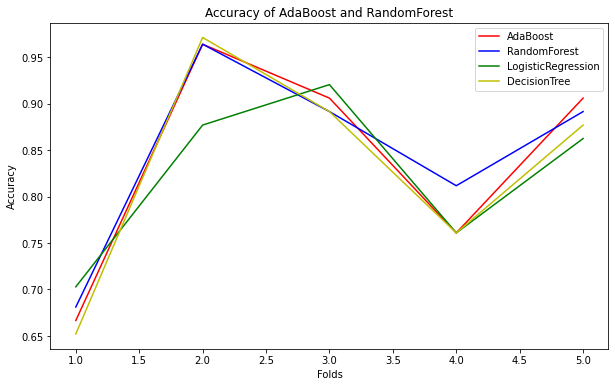

In [88]:
# 绘制对比图
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))



plt.plot([1,2,3,4,5],scores_ada,'r',label='AdaBoost')
plt.plot([1,2,3,4,5],scores_rf,'b',label='RandomForest')
plt.plot([1,2,3,4,5],scores_lr,'g',label='LogisticRegression')
plt.plot([1,2,3,4,5],scores_dt,'y',label='DecisionTree')


plt.legend(loc='upper right')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy of AdaBoost and RandomForest')
plt.show()

In [92]:
# 对于四种分析方法的准确率、方差列成表格

data = {'AdaBoost':[scores_ada.mean(),scores_ada.std()],'RandomForest':[scores_rf.mean(),scores_rf.std()],'LogisticRegression':[scores_lr.mean(),scores_lr.std()],'DecisionTree':[scores_dt.mean(),scores_dt.std()]}
df = pd.DataFrame(data,index=['Accuracy','Variance'])
df

,AdaBoost,RandomForest,LogisticRegression,DecisionTree
Accuracy,0.840580,0.847826,0.824638,0.830435
Variance,0.109801,0.096243,0.080222,0.111566


In [99]:
# 评价各个维度数据的重要性

clf = RandomForestClassifier(n_estimators=120, max_depth=3)

clf.fit(data_ori[predictors], data_ori[target])

importances = clf.feature_importances_ # 数值越大，说明该特征越重要
# print(importances)

# 重要性和特征名称对应
indices = np.argsort(importances)[::-1]
indices

# 打印出最重要的10个特征所在的列名
for f in range(10):
    print("%2d) %-*s %f" % (f + 1, 30, predictors[indices[f]], importances[indices[f]]))



 1) A9                             0.332843
 2) A11                            0.207144
 3) A10                            0.151172
 4) A8                             0.090728
 5) A15                            0.083590
 6) A3                             0.035560
 7) A14                            0.028916
 8) A2                             0.020753
 9) A6                             0.017499
10) A5                             0.011213


In [111]:
# 对于数据进行降维度处理
from sklearn.decomposition import PCA

# 降维度到2维
pca = PCA(n_components=2)
pca.fit(data_ori[predictors])
X_pca = pca.transform(data_ori[predictors])

print("original shape:   ", data_ori[predictors].shape)

# 比较降维前后的数据得到的准确率和之前的对比
clf = RandomForestClassifier(n_estimators=120, max_depth=3)
scores_rf = cross_val_score(clf, data_ori[predictors], data_ori[target], cv=5)

print ('ori=',scores_rf)

clf = RandomForestClassifier(n_estimators=120, max_depth=3)
scores_rf_new = cross_val_score(clf, X_pca, data_ori[target], cv=5)

print ('2-dision=',scores_rf_new)

# 降维度到3维
pca = PCA(n_components=3)
pca.fit(data_ori[predictors])
X_pca = pca.transform(data_ori[predictors])

score_rf_new_3 = cross_val_score(clf, X_pca, data_ori[target], cv=5)
print ('3-dision=',score_rf_new_3)

# 降维度到4维
pca = PCA(n_components=4)
pca.fit(data_ori[predictors])
X_pca = pca.transform(data_ori[predictors])

score_rf_new_4 = cross_val_score(clf, X_pca, data_ori[target], cv=5)
print ('4-dision=',score_rf_new_4)

# 降维度到5维
pca = PCA(n_components=5)
pca.fit(data_ori[predictors])
X_pca = pca.transform(data_ori[predictors])

score_rf_new_5 = cross_val_score(clf, X_pca, data_ori[target], cv=5)
print ('5-dision=',score_rf_new_5)

# 降维度到6维
pca = PCA(n_components=6)
pca.fit(data_ori[predictors])
X_pca = pca.transform(data_ori[predictors])

score_rf_new_6 = cross_val_score(clf, X_pca, data_ori[target], cv=5)
print ('6-dision=',score_rf_new_6)

# 降维度到7维
pca = PCA(n_components=7)
pca.fit(data_ori[predictors])
X_pca = pca.transform(data_ori[predictors])

score_rf_new_7 = cross_val_score(clf, X_pca, data_ori[target], cv=5)
print ('7-dision=',score_rf_new_7)

# 降维度到8维
pca = PCA(n_components=8)
pca.fit(data_ori[predictors])
X_pca = pca.transform(data_ori[predictors])

score_rf_new_8 = cross_val_score(clf, X_pca, data_ori[target], cv=5)
print ('8-dision=',score_rf_new_8)


original shape:    (690, 15)
ori= [0.67391304 0.96376812 0.89130435 0.79710145 0.88405797]
2-dision= [0.67391304 0.73913043 0.69565217 0.6884058  0.67391304]
3-dision= [0.67391304 0.74637681 0.6884058  0.65217391 0.68115942]
4-dision= [0.65217391 0.77536232 0.74637681 0.71014493 0.69565217]
5-dision= [0.70289855 0.7826087  0.73913043 0.68115942 0.74637681]
6-dision= [0.7173913  0.76811594 0.73913043 0.67391304 0.74637681]
7-dision= [0.69565217 0.7826087  0.74637681 0.73188406 0.76811594]
8-dision= [0.66666667 0.80434783 0.76086957 0.69565217 0.73913043]
